In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [29]:
df = pd.read_csv("data_sets/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


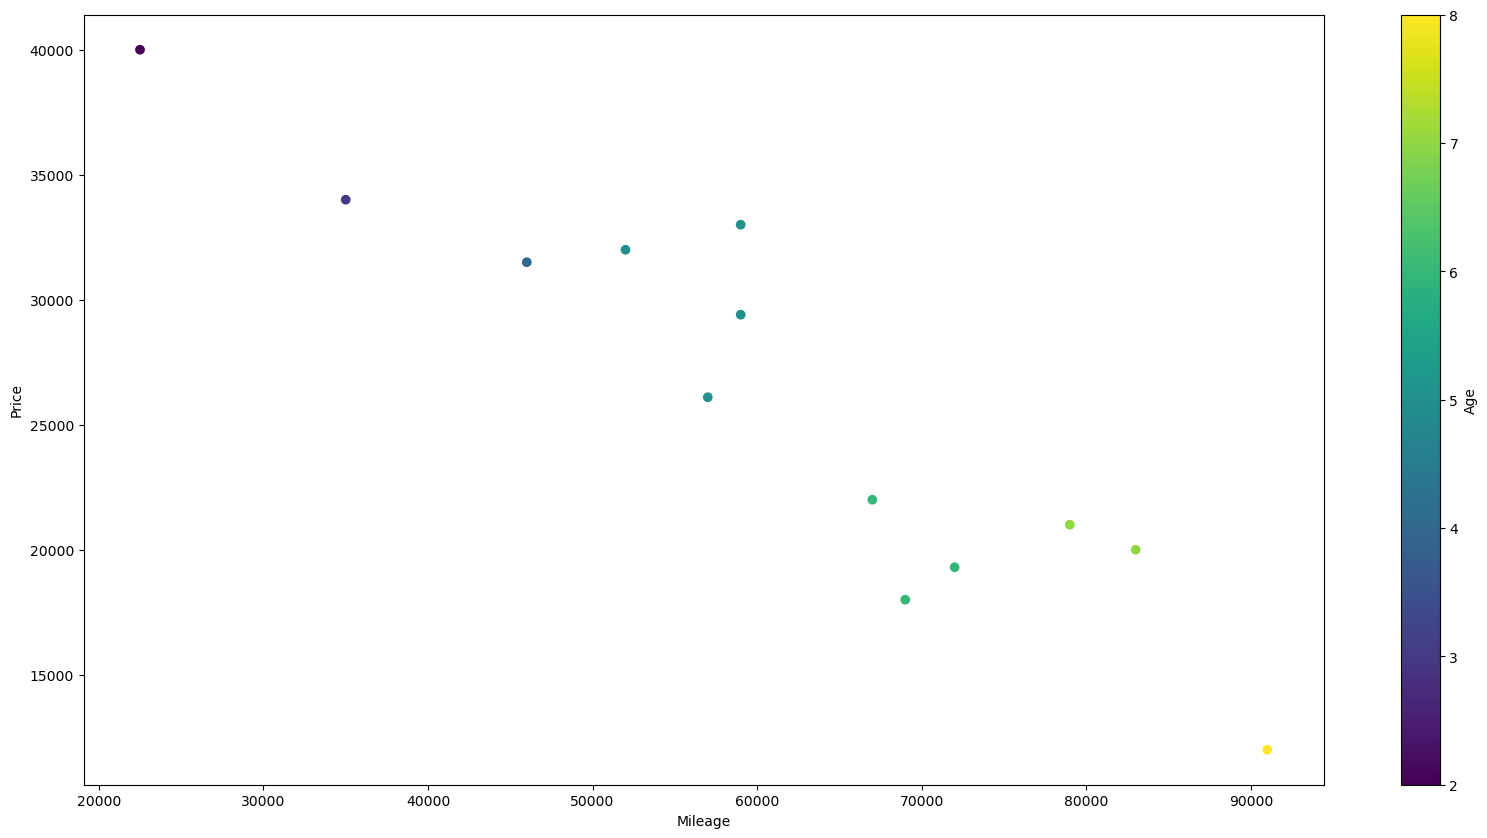

In [30]:
# plot a scatter plot to see the trend between mileage, age and price
# plt.scatter(df["Mileage"], df["Price"])
# add the age to the scatter plot
plt.scatter(df["Mileage"], df["Sell Price($)"], c=df["Age(yrs)"])
plt.colorbar(label='Age')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [31]:
# convert the car brand into numerical values using one-hot encoding from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

In [32]:
df["Car Model"] = le.fit_transform(df["Car Model"])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [33]:
# hot encode the car model column
ohe = OneHotEncoder()
df_ohe = ohe.fit_transform(df[["Car Model"]]).toarray()
df_ohe


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [34]:
# drop one of the columns to avoid the dummy variable trap
df_ohe = df_ohe[:,1:]
df_ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [40]:
# add to the original dataframe
df_final = pd.concat([df, pd.DataFrame(df_ohe)], axis=1)
df_final

,Mileage,Sell Price($),Age(yrs),0,1
0,69000,18000,6,1.0,0.0
1,35000,34000,3,1.0,0.0
2,57000,26100,5,1.0,0.0
3,22500,40000,2,1.0,0.0
4,46000,31500,4,1.0,0.0
5,59000,29400,5,0.0,0.0
6,52000,32000,5,0.0,0.0
7,72000,19300,6,0.0,0.0
8,91000,12000,8,0.0,0.0
9,67000,22000,6,0.0,1.0


In [49]:
df_final

,Mileage,Sell Price($),Age(yrs),0,1
0,69000,18000,6,1.0,0.0
1,35000,34000,3,1.0,0.0
2,57000,26100,5,1.0,0.0
3,22500,40000,2,1.0,0.0
4,46000,31500,4,1.0,0.0
5,59000,29400,5,0.0,0.0
6,52000,32000,5,0.0,0.0
7,72000,19300,6,0.0,0.0
8,91000,12000,8,0.0,0.0
9,67000,22000,6,0.0,1.0


In [51]:
# train the model
from sklearn.linear_model import LinearRegression

# Convert all column names to strings to fix the mixed type error
X = df_final.drop(["Sell Price($)",], axis=1)
X.columns = X.columns.astype(str)
y = df_final["Sell Price($)"]

model = LinearRegression()
model.fit(X, y).score(X, y)


0.9417050937281082

In [54]:
model.predict([[45000, 9, 0, 1]])  # example input: Mileage=45000, Age=9, Car Model encoded values

/home/build/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30329.04907255])